In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2
from datetime import datetime
from os.path import join
from SHD_functions import test, find_circles, crop_image, get_colors, find_PH

In [2]:
# Assign data types for import
jpg = 'jpg'

# Create list of files
path = 'Data'
os.chdir(path)
files = [i for i in glob.glob('*.{}'.format(jpg))]
os.chdir('..')

In [3]:
def get_datetimes(files):
    dates = []
    for file in files:
        dates.append(datetime.strptime(file[4:-4], '%Y%m%d_%H%M%S'))
    return pd.Series(dates)

In [4]:
datetimes = get_datetimes(files)
datetimes

0   2018-11-03 10:18:43
1   2018-11-03 10:19:07
2   2018-11-03 10:19:42
3   2018-11-03 10:20:06
4   2018-11-03 10:20:30
5   2018-11-03 10:20:51
6   2018-11-03 10:22:21
dtype: datetime64[ns]

In [10]:
def get_pHs(files):
    pHs = []
    i = 1
    for file in files:
        print(file)
        image = imutils.resize(cv2.imread(join(path, file)), width=1024)
        circles = find_circles(image)
        cropped = crop_image(image, circles)  
        scale = get_colors(cropped, range(100, 600, 75), [200, 270, 380, 460])
        measurement = get_colors(cropped, [800], [200, 270])
        pH = find_PH(scale, measurement)
        pHs.append(pH)
    return pd.Series(pHs)

In [11]:
pHs = get_pHs(files)
pHs

IMG_20181103_101843.jpg
(1, 4, 3)
IMG_20181103_101907.jpg
(1, 4, 3)
IMG_20181103_101942.jpg
(1, 4, 3)
IMG_20181103_102006.jpg
(1, 4, 3)
IMG_20181103_102030.jpg
(1, 4, 3)
IMG_20181103_102051.jpg
(1, 4, 3)
IMG_20181103_102221.jpg
(1, 4, 3)


0    5.50
1    5.50
2    7.50
3    5.50
4    5.50
5    6.25
6    8.00
dtype: float64

In [12]:
df = pd.DataFrame({'Date':datetimes, 'pH':pHs})

In [13]:
df = df.set_index('Date')

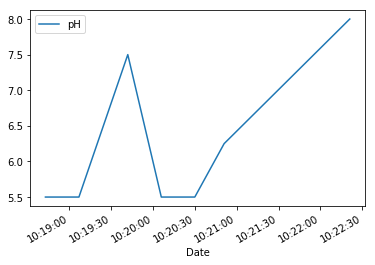

In [14]:
df.plot()